In [1]:
# reload the module after changed
%load_ext autoreload
%autoreload 2


import torch
import torch.nn as nn
import torch.nn.functional as F


import numpy as np
import matplotlib.pyplot as plt

from utilities3 import *
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/liux0t/miniconda3/envs/MgNO/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
u_list, delta_u_list, sol_true = torch.load('/home/liux0t/neural_MG/pytorch/newton_method_iterations_7_solution.pt')
y = delta_u_list.float().to(device).squeeze()
x = u_list.to(device).float()
# y = y/y.max()
# x = x/x.max()
dataOpt = {}
dataOpt['batch_size'] = 10
dataOpt['dataSize'] = {'train': range(5000), 'test': range(5000, 5500), 'val':range(600,650)}

x_train = x[dataOpt['dataSize']['train'],...]
y_train = y[dataOpt['dataSize']['train'],...]
x_test = x[dataOpt['dataSize']['test'],...]
y_test = y[dataOpt['dataSize']['test'],...]
# x_val = x[dataOpt['dataSize']['val'],...]
# y_val = y[dataOpt['dataSize']['val'],...]

# x_normalizer = UnitGaussianNormalizer(x_train)
# x_train = x_normalizer.encode(x_train)
# x_test = x_normalizer.encode(x_test)
# if model_type == 'FNO':
# x_train = x_train.squeeze()
# x_test = x_test.squeeze()
# x_train = x_train[:, ..., np.newaxis]
# x_test = x_test[:, ..., np.newaxis]

In [3]:
x.shape

torch.Size([5667, 1, 63, 63])

In [3]:
# train_loader = DataLoader(TensorDataset(x_train_aug.contiguous(), y_train_aug.contiguous()), batch_size=dataOpt['batch_size'], shuffle=True)
test_loader = DataLoader(TensorDataset(x_test.contiguous(), y_test.contiguous()), batch_size=dataOpt['batch_size'], shuffle=False)

In [40]:
model = torch.load('/home/liux0t/FMM/MgNO/model/MgNO_DC_6ns_merge2024-03-21 20:37:17.399499.pt')
model.eval()
l2loss = LpLoss(size_average=False) 
test_l2 = 0.
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        out = model(x).squeeze()
        test_l2 += l2loss(out, y).item()
        

test_l2/= len(dataOpt['dataSize']['test'])
test_l2

465723.61514746095

In [6]:
model = torch.load('/home/liux0t/FMM/MgNO/model/MgNO_DC_6ns_merge2024-03-21 12:20:30.952129.pt')
model.eval()
l2loss = LpLoss(size_average=False) 
h1loss = HsLoss_2(d=2, p=2, k=2, size_average=False, res=y_train.size(2), relative=False).to(device)
test_l2 = 0.
test_h1 = 0.
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        out = model(x).squeeze()
        test_l2 += l2loss(out, y).item()
        test_h1 += h1loss(out, y).item()

test_l2/= len(dataOpt['dataSize']['test'])
test_h1/= len(dataOpt['dataSize']['test'])
test_l2, test_h1


(1.2225145006775855, 54.24163897705078)

In [5]:


model = torch.load('/home/liux0t/FMM/MgNO/model/MgNO_DC_6ns_merge2024-03-23 22:20:42.589980.pt')
model.eval()
l2loss = LpLoss(size_average=False) 
test_l2 = 0.
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        out = model(x).squeeze()
        test_l2 += l2loss(out, y).item()
        
test_l2/= len(dataOpt['dataSize']['test'])
test_l2

0.987639023989439

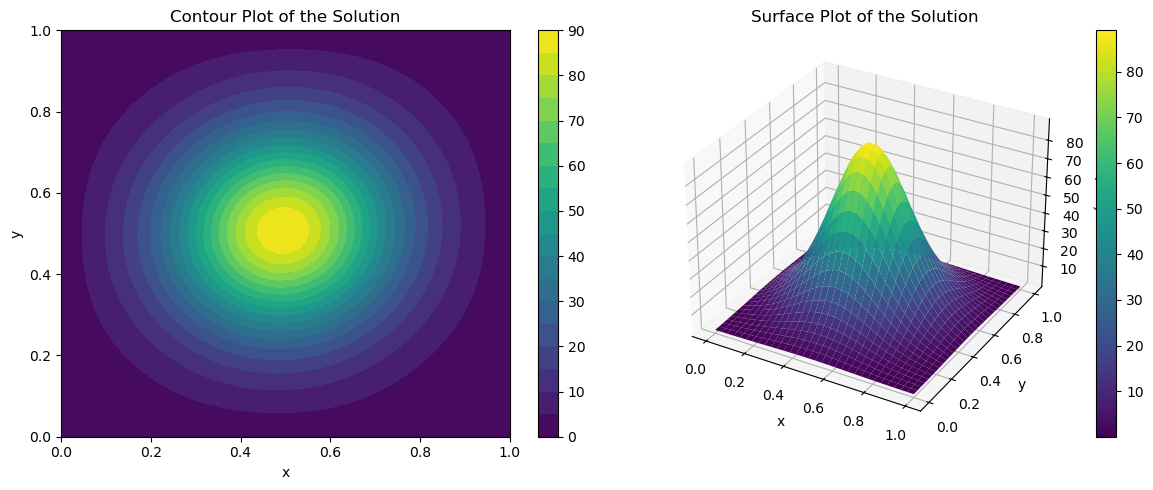

<Figure size 640x480 with 0 Axes>

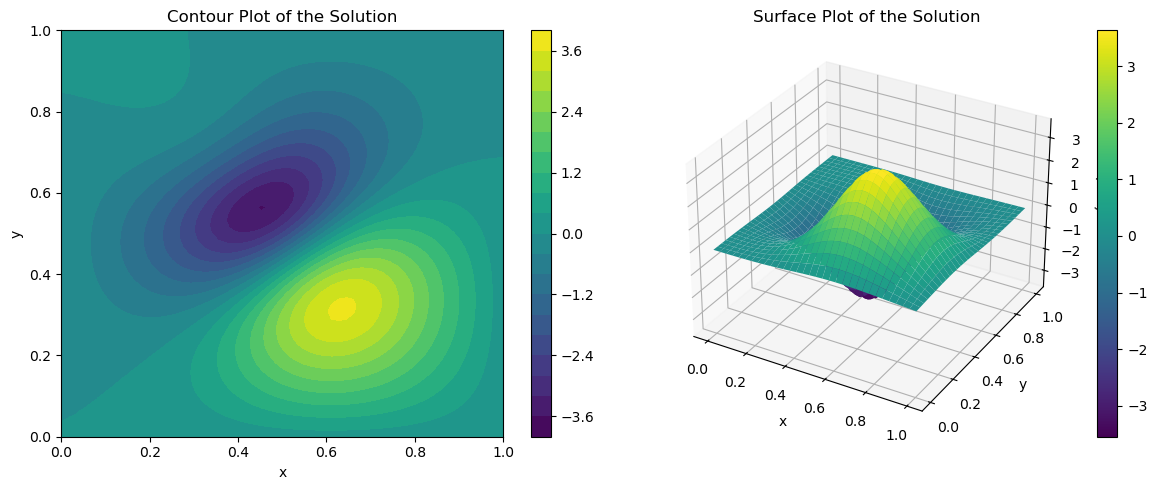

<Figure size 640x480 with 0 Axes>

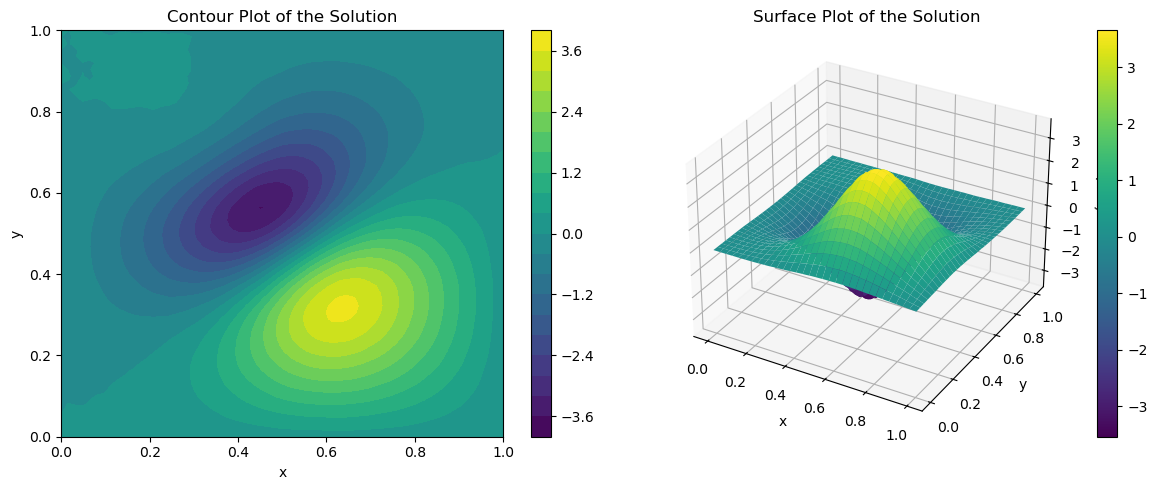

<Figure size 640x480 with 0 Axes>

In [12]:
ite = iter(test_loader)
x, y = next(ite)
i = 3
visual2d(x[i].squeeze().cpu().numpy(), 'newton_input')

out = model(x.to(device)).squeeze()
visual2d(y[i].cpu().numpy(), 'newton_true')
visual2d(out[i].detach().cpu().numpy(), 'newton_pred')


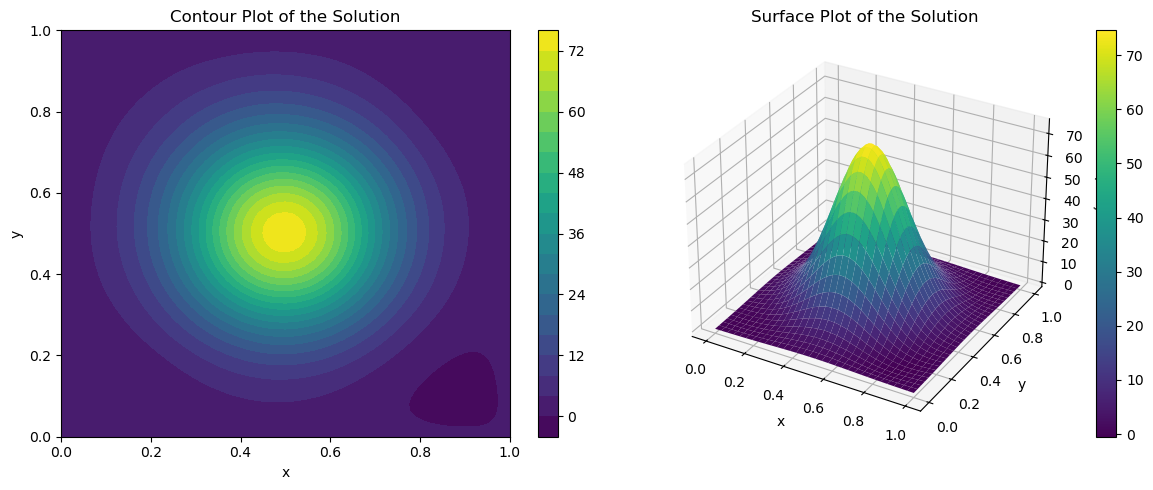

<Figure size 640x480 with 0 Axes>

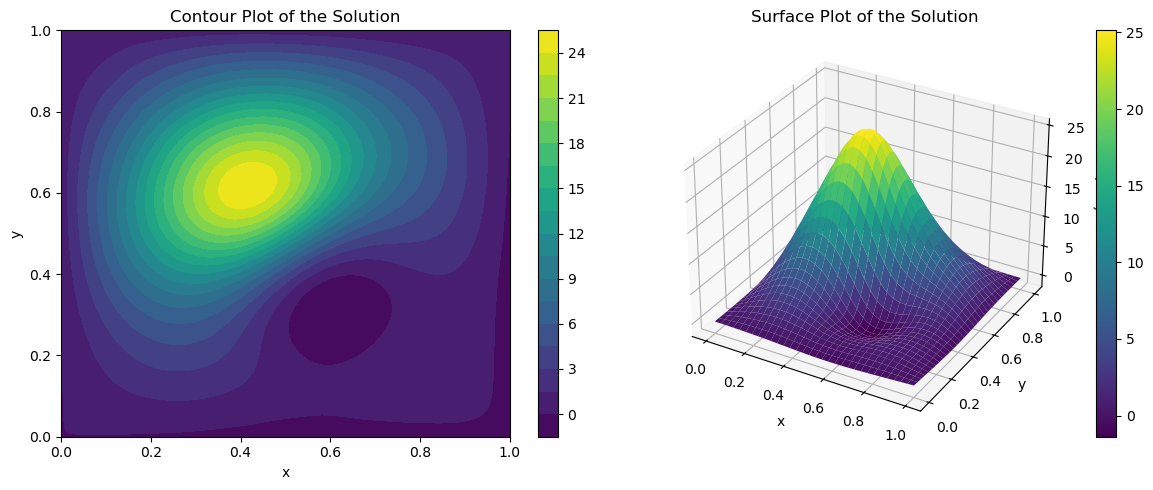

<Figure size 640x480 with 0 Axes>

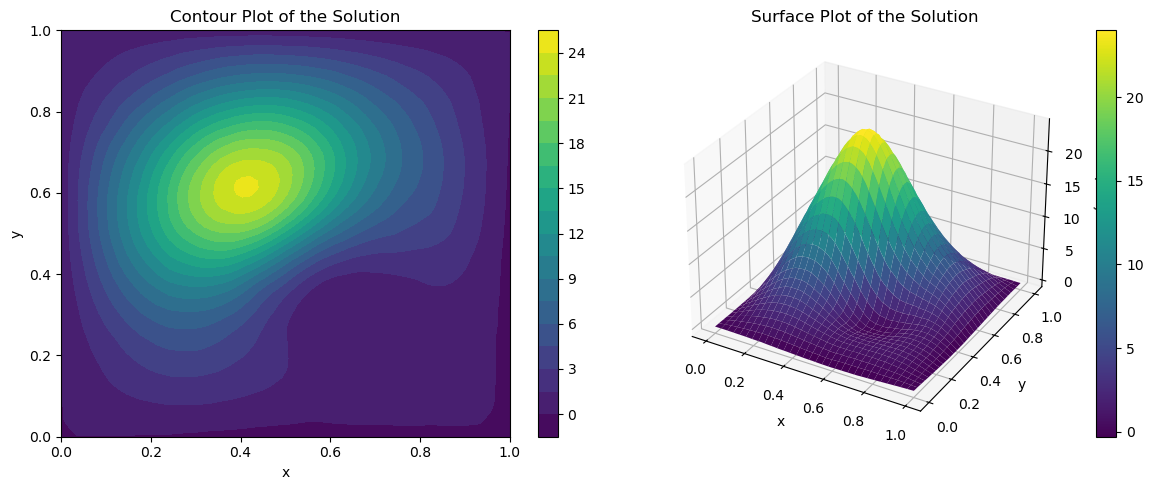

<Figure size 640x480 with 0 Axes>

In [13]:
i=1
visual2d(x[i].squeeze().cpu().numpy(), 'newton_input')
visual2d(y[i].cpu().numpy(), 'newton_true')
visual2d(out[i].detach().cpu().numpy(), 'newton_pred')

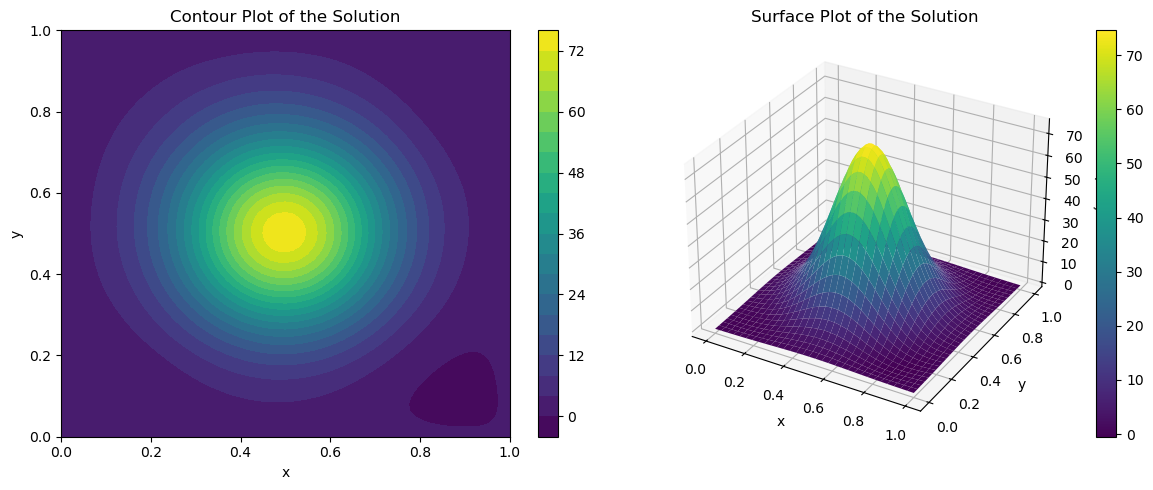

norm of du: tensor(507.0874, device='cuda:0')
norm of du: tensor(279.5540, device='cuda:0')
norm of du: tensor(72.7055, device='cuda:0')
norm of du: tensor(3.1519, device='cuda:0')
norm of du: tensor(0.2473, device='cuda:0')
norm of du: tensor(0.1881, device='cuda:0')
norm of du: tensor(0.1014, device='cuda:0')
norm of du: tensor(0.0957, device='cuda:0')
norm of du: tensor(0.0715, device='cuda:0')
norm of du: tensor(0.0665, device='cuda:0')
norm of du: tensor(0.0843, device='cuda:0')
norm of du: tensor(0.0767, device='cuda:0')
norm of du: tensor(0.0799, device='cuda:0')
norm of du: tensor(0.0874, device='cuda:0')
norm of du: tensor(0.0749, device='cuda:0')
norm of du: tensor(0.0646, device='cuda:0')
norm of du: tensor(0.0540, device='cuda:0')
norm of du: tensor(0.0656, device='cuda:0')
norm of du: tensor(0.0526, device='cuda:0')
norm of du: tensor(0.0558, device='cuda:0')
norm of du: tensor(0.0628, device='cuda:0')
norm of du: tensor(0.0535, device='cuda:0')
norm of du: tensor(0.0498, 

<Figure size 640x480 with 0 Axes>

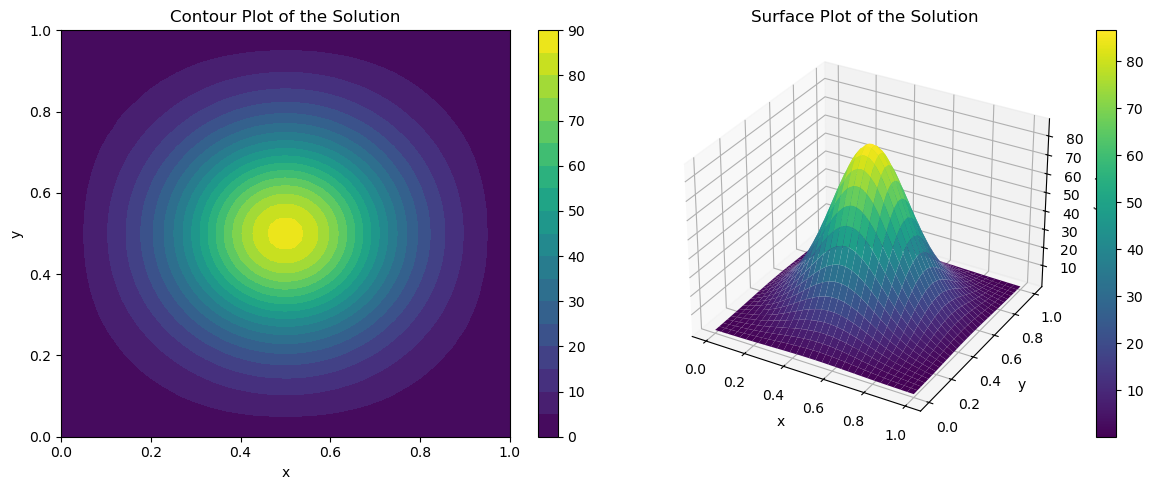

<Figure size 640x480 with 0 Axes>

In [14]:
# wirte a newton method to solve the equation by using the model
# du = model(u), du denotes the newton step of u
# u = u + du
# repeat until du is small enough less than a threshold or reach the maximum iteration
# u is the solution of the equation
# we can use the model to solve the equation by using the newton method



def newton_method(model, u, max_iter=100, tol=5e-2):
    for i in range(max_iter):
        du = model(u)
        print('norm of du:', torch.norm(du))
        if torch.norm(du) < tol:
            print('converge', i)
            break
        u = u + du
    return u

with torch.no_grad():
    # u = x[0:1].to(device)
    # u = newton_method(model, u)
    # visual2d(u[0,0].cpu().numpy(), 'newton_pred')

    u = x[1:2].to(device)
    visual2d(u[0,0].cpu().numpy(), 'newton_init')
    u = newton_method(model, u)
    visual2d(u[0,0].cpu().numpy(), 'newton_pred')

In [15]:
i = 2
torch.norm(out[i] - y[i])/torch.norm(y[i])

tensor(0.0112, device='cuda:0', grad_fn=<DivBackward0>)

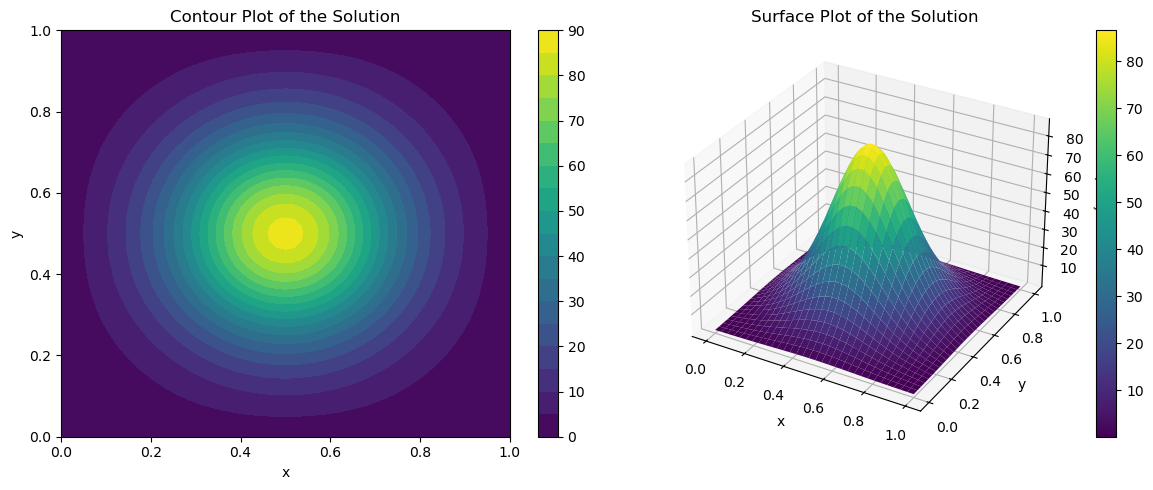

tensor(0.0008, device='cuda:0', dtype=torch.float64)


<Figure size 640x480 with 0 Axes>

In [16]:
visual2d(sol_true, 'newton_pred')
sol_true = torch.tensor(sol_true).to(device)
error = torch.norm(sol_true - u)/torch.norm(sol_true)
print(error)

In [17]:
with torch.no_grad():
    # u = x[0:1].to(device)
    # u = newton_method(model, u)
    # visual2d(u[0,0].cpu().numpy(), 'newton_pred')
    for i in range(1, 20, 3):
        u = x_test[i:i+1].to(device)
        print(torch.norm(x_test[i]-sol_true)/torch.norm(sol_true))
        u = newton_method(model, u)
        print(torch.norm(u-sol_true)/torch.norm(sol_true))
    

tensor(0.2229, device='cuda:0', dtype=torch.float64)
norm of du: tensor(507.0874, device='cuda:0')
norm of du: tensor(279.5540, device='cuda:0')
norm of du: tensor(72.7055, device='cuda:0')
norm of du: tensor(3.1519, device='cuda:0')
norm of du: tensor(0.2473, device='cuda:0')
norm of du: tensor(0.1670, device='cuda:0')
norm of du: tensor(0.1100, device='cuda:0')
norm of du: tensor(0.0848, device='cuda:0')
norm of du: tensor(0.0668, device='cuda:0')
norm of du: tensor(0.0840, device='cuda:0')
norm of du: tensor(0.0766, device='cuda:0')
norm of du: tensor(0.0601, device='cuda:0')
norm of du: tensor(0.0563, device='cuda:0')
norm of du: tensor(0.0512, device='cuda:0')
norm of du: tensor(0.0578, device='cuda:0')
norm of du: tensor(0.0741, device='cuda:0')
norm of du: tensor(0.0584, device='cuda:0')
norm of du: tensor(0.0786, device='cuda:0')
norm of du: tensor(0.0630, device='cuda:0')
norm of du: tensor(0.0670, device='cuda:0')
norm of du: tensor(0.0658, device='cuda:0')
norm of du: tensor

In [18]:
x_test_init = x_test[1::3]
x_test_init.shape

torch.Size([167, 1, 63, 63])

In [19]:
class LpLoss(object):
    def __init__(self, d=2, p=2, size_average=True, reduction=True, relative=True):
        super().__init__()

        #Dimension and Lp-norm type are postive
        assert d > 0 and p > 0

        self.d = d
        self.p = p
        self.reduction = reduction
        self.size_average = size_average
        self.relative = relative

    def abs(self, x, y):
        num_examples = x.size()[0]

        #Assume uniform mesh
        h = 1.0 / (x.size()[1] - 1.0)

        all_norms = (h**(self.d/self.p))*torch.norm(x.view(num_examples,-1) - y.view(-1), self.p, 1)

        if self.reduction:
            if self.size_average:
                return torch.mean(all_norms)
            else:
                return torch.sum(all_norms)

        return all_norms

    def rel(self, x, y):
        num_examples = x.size()[0]

        diff_norms = torch.norm(x.view(num_examples,-1) - y.flatten(), self.p, 1)
        y_norms = torch.norm(y.view(-1), self.p)

        if self.reduction:
            if self.size_average:
                return torch.mean(diff_norms/y_norms)
            else:
                if self.relative:
                    return torch.sum(diff_norms/y_norms)
                else: 
                    return torch.sum(diff_norms)

        return diff_norms/y_norms

    def __call__(self, x, y):
        
        return self.rel(x, y)

loss = LpLoss(reduction=False, relative=True)

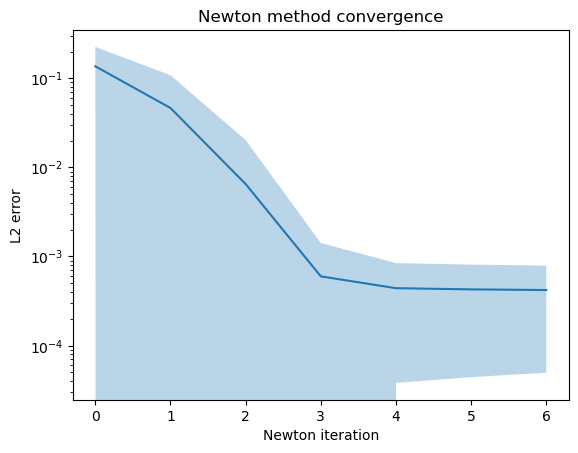

In [20]:
with torch.no_grad():
    
    u1 = x_test_init 
    l2error_list = [loss(u1, sol_true)]
    for i in range(6):
        u1 = u1 + model(u1)
        l2error = loss(u1, sol_true)
        l2error_list.append(l2error)

l2error_his = torch.stack(l2error_list)
l2error_his_std = l2error_his.std(dim=1)
l2error_his_mean = l2error_his.mean(dim=1)
# plot the l2 error of the newton method with std and mean with shaded area, semilogy

plt.semilogy(l2error_his_mean.cpu().numpy())
# plt.plot(l2error_his_mean.cpu().numpy())
plt.fill_between(range(7), (l2error_his_mean-l2error_his_std).cpu().numpy(), (l2error_his_mean+l2error_his_std).cpu().numpy(), alpha=0.3)
plt.xlabel('Newton iteration')
plt.ylabel('L2 error')
plt.title('Newton method convergence')
plt.show()

Text(0.5, 0, 'Newton iteration')

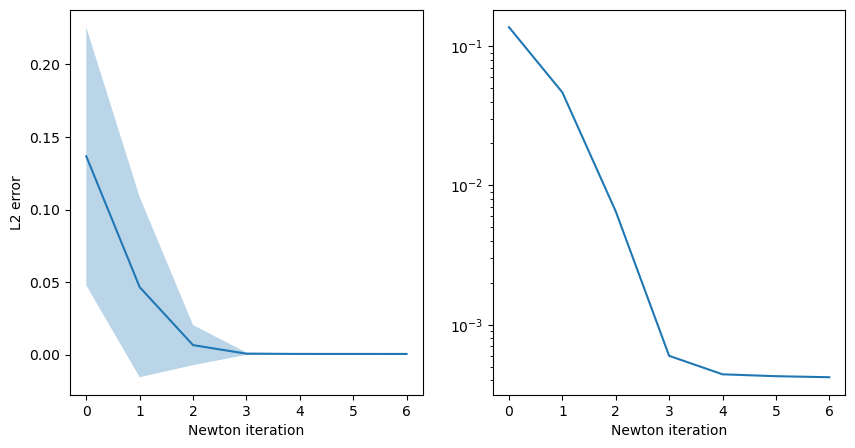

In [21]:
l2error_his_std = l2error_his.std(dim=1)
l2error_his_mean = l2error_his.mean(dim=1)
# plot the l2 error of the newton method with std and mean with shaded area, semilogy
# using subplot to plot two fitures. Firs is  with plot and the second is with semilogy 
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.plot(l2error_his_mean.cpu().numpy())
plt.fill_between(range(7), (l2error_his_mean-l2error_his_std).cpu().numpy(), (l2error_his_mean+l2error_his_std).cpu().numpy(), alpha=0.3)
plt.xlabel('Newton iteration')
plt.ylabel('L2 error')

plt.subplot(122)
plt.semilogy(l2error_his_mean.cpu().numpy())
plt.xlabel('Newton iteration')


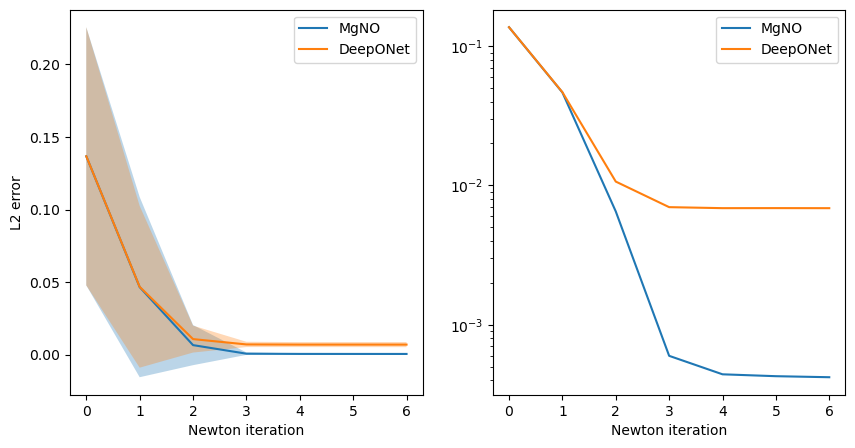

In [22]:
model_2 = torch.load('/home/liux0t/FMM/MgNO/model/DeepONetns_merge2024-03-23 22:37:45.941249.pt')
model_2.eval()
loss = LpLoss(reduction=False, relative=True)

with torch.no_grad():
    u2 = x_test_init
    l2error_list_2 = [loss(u2, sol_true)]
    for i in range(6):
        u2 = u2 + model_2(u2).unsqueeze(1)
        l2error = loss(u2, sol_true)
        l2error_list_2.append(l2error)


l2error_his_2 = torch.stack(l2error_list_2)
l2error_his_2.shape

l2error_his_std_2 = l2error_his_2.std(dim=1)
l2error_his_mean_2 = l2error_his_2.mean(dim=1)
# plot the l2 error of the newton method with std and mean with shaded area, semilogy
# using subplot to plot two fitures. Firs is  with plot and the second is with semilogy
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.plot(l2error_his_mean.cpu().numpy(), label='MgNO')
plt.fill_between(range(7), (l2error_his_mean-l2error_his_std).cpu().numpy(), (l2error_his_mean+l2error_his_std).cpu().numpy(), alpha=0.3)
plt.plot(l2error_his_mean_2.cpu().numpy(), label='DeepONet')
plt.fill_between(range(7), (l2error_his_mean_2-l2error_his_std_2).cpu().numpy(), (l2error_his_mean_2+l2error_his_std_2).cpu().numpy(), alpha=0.3)
plt.xlabel('Newton iteration')
plt.ylabel('L2 error')
plt.legend()

plt.subplot(122)
plt.semilogy(l2error_his_mean.cpu().numpy(), label='MgNO')
plt.semilogy(l2error_his_mean_2.cpu().numpy(), label='DeepONet')
plt.xlabel('Newton iteration')
plt.legend()
plt.show()



In [23]:
x_train[:2,...].shape, y_train[:2,...].shape

(torch.Size([2, 1, 63, 63]), torch.Size([2, 63, 63]))

In [50]:
pdeloss = PDEloss_2().to(device)
print(pdeloss(x_train[:100,...], y_train[:100,...].unsqueeze(1)))
print(pdeloss(x_train[:100,...], torch.zeros(100, 1, 63, 63).to(device)))

tensor(0.0239, device='cuda:0')
tensor(12830233., device='cuda:0')


In [41]:
print(pdeloss(x_train, y_train.unsqueeze(1)))
print(h1loss(x_train, y_train.unsqueeze(1)))

tensor(76.3832, device='cuda:0')


In [25]:
torch.linalg.norm(y_train[:1,...])

tensor(686.3218, device='cuda:0')

In [26]:
h1loss = HsLoss(d=2, p=2, k=1, a=[1,1], size_average=False, res=y_train.size(2), relative=False)
h1loss.cuda(device)
l2loss = LpLoss(size_average=False, relative=False ) 

In [27]:
l2error = l2loss(u1[0,...], sol_true)
l2error

tensor(1.4639, device='cuda:0', dtype=torch.float64)

In [28]:
torch.linalg.norm(u1[0,...]-sol_true)

tensor(1.4639, device='cuda:0', dtype=torch.float64)

In [29]:
2.355/0.0380

61.973684210526315

In [30]:
train_h1loss, train_f_l2loss, f_l2x, f_l2y = h1loss(u1[0,...], sol_true.unsqueeze(0))

In [31]:
train_f_l2loss, train_h1loss

(tensor(1.4639, device='cuda:0', dtype=torch.float64),
 tensor(17.6032, device='cuda:0', dtype=torch.float64))

In [32]:
u1.shape, sol_true.shape

(torch.Size([167, 1, 63, 63]), torch.Size([63, 63]))

In [33]:
loss = HsLoss_2(d=2, p=2, k=1, a=[1,1], size_average=False, res=y_train.size(2), relative=False).to(device)

In [35]:
# test the loss function
x_1 = torch.randn(10, 1, 63, 63).to(device)
y_1 = torch.randn(10, 1, 63, 63).to(device)
eror = loss(x_1, y_1)
eror

tensor(1438.7019, device='cuda:0')